# End-To-End  Example of Rain  Estimation using PyNNCML Via Satellite Microwave Links (SML)
This notebook presents an end-to-end example of rain estimation using Kalman Filter.
This tutorial is built using the PyNNCML software package, which provides  tools to simplify the usage of SML Rain estimation.
The tutorial is divided into the following sections:
1. Imports and Installation of PyNNCML
2. Load SML Data
3. Rain Estimation using SML without Preprocessing
4. Rain Estimation using SML with Preprocessing

[Run this tutorial in Google Colab](https://colab.research.google.com/github/haihabi/PyNNcml/blob/main/examples/rain_estimation_sml.ipynb)

This example is based on the opensense training school github: https://github.com/OpenSenseAction/training_school_opensene_2023/blob/main/notebooks_sml/RainSat.ipynb

# Imports and Installation of PyNNCML

In [1]:
import os
import sys


if os.path.exists('../pynncml'):
    print("Import PyNNCML From Code")
    sys.path.append('../')  # This line is need to import pynncml
else:
    print("Install PyNNCML From pip")
    !pip install pynncml
import pandas as pd
import pynncml as pnc
import torch
from datetime import date

Import PyNNCML From Code


/data/envs/research/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load SML and Rain Gauge Data with plotting

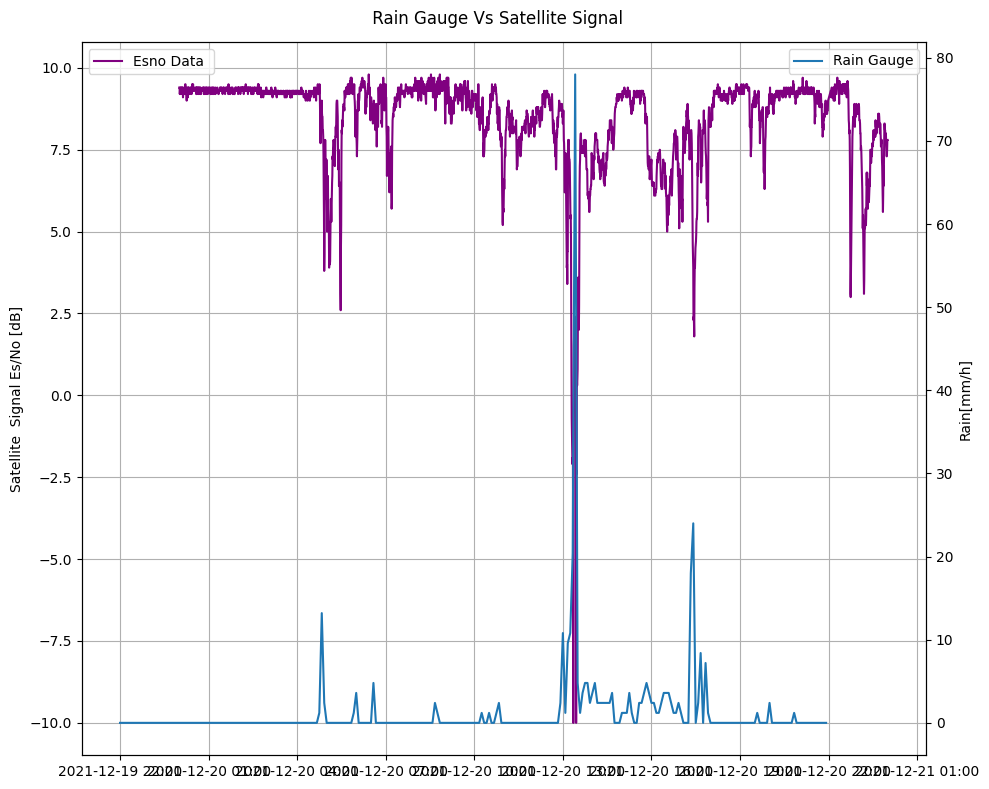

In [2]:
rain_df=pd.read_csv(os.path.join("./data/", 'SML_Rain.csv'))
sat_df=pd.read_csv(os.path.join("./data/", 'SML_Sat.csv'))

def filter_by_data(pd_array, date,name='datetime'):
    """
    Filters a pandas DataFrame by a specific date.
    """
    pd_array[name] = pd.to_datetime(pd_array[name])
    res = pd_array[pd_array[name].dt.date == date]
    return res


date_sel= date(2021, 12, 20)

rain_data=filter_by_data(rain_df,date_sel)
sat_data=filter_by_data(sat_df,date_sel,name="timestamp")

rain_array=torch.tensor(rain_data.value.to_numpy())
rain_datetime=rain_data.datetime
sat_array=torch.tensor(sat_data.esno.to_numpy())
sat_datetime=sat_data.timestamp
pnc.ssm.plot_rain_vs_sat_data(rain_array, rain_datetime, sat_array, sat_datetime)

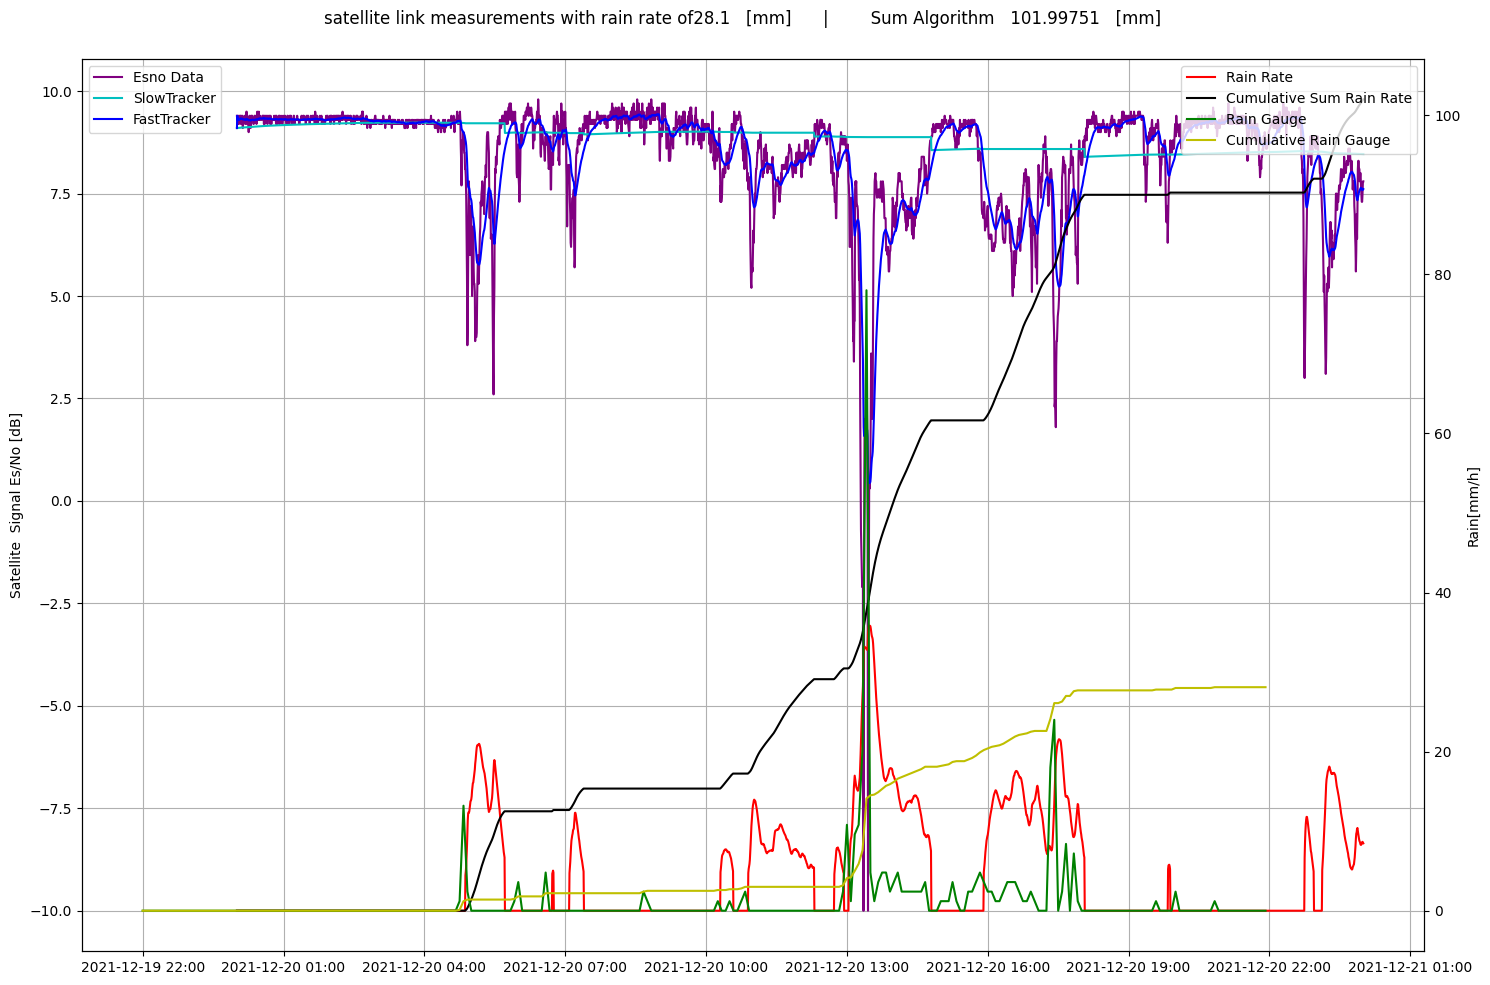

In [3]:
[rain_estimated,ST,FT]=pnc.ssm.sml_rain_estimator(sat_array.unsqueeze(dim=0),preprocess=False)
pnc.ssm.plot_sat_data.plot_rain_estimation_vs_gauge_data(rain_estimated,ST, FT,rain_array.unsqueeze(dim=0), rain_datetime, sat_array.unsqueeze(dim=0), sat_datetime)

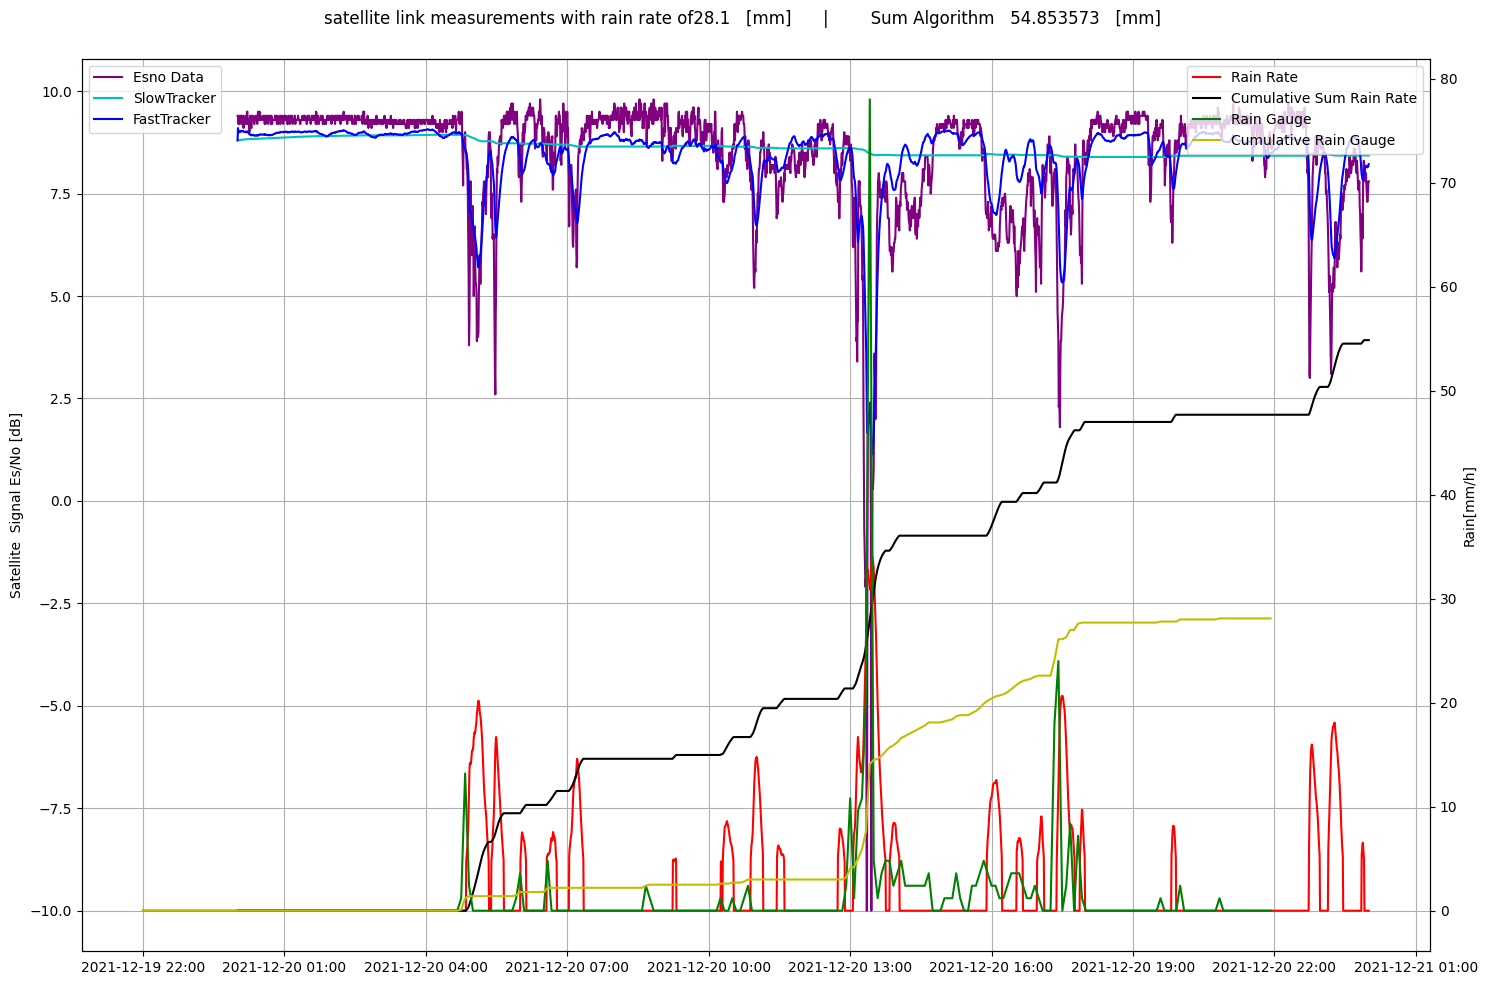

In [4]:
[rain_estimated,ST,FT]=pnc.ssm.sml_rain_estimator(sat_array.unsqueeze(dim=0),preprocess=True)
pnc.ssm.plot_sat_data.plot_rain_estimation_vs_gauge_data(rain_estimated,ST, FT,rain_array.unsqueeze(dim=0), rain_datetime, sat_array.unsqueeze(dim=0), sat_datetime)